## 2. 오차행렬


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy,precision,recall))

In [16]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    fillna(df)
    drop_features(df)
    format_features(df)
    return df

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df=pd.read_csv('titanic/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)


오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:0.7742, 재현율:0.7869


C:\Users\jeehy\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
pred_proba=lr_clf.predict_proba(X_test)
print('pred_proba()결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array 에서 앞 3개 값만 추출 \n:',pred_proba[:3])

pred_proba()결과 shape: (179, 2)
pred_proba array 에서 앞 3개 값만 추출 
: [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]


In [21]:
print(pred[:3])

[1 0 0]


In [22]:
from sklearn.preprocessing import Binarizer
x=[[1,-1,2],[2,0,0],[0,1.1,1.2]]
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [29]:
from sklearn.preprocessing import Binarizer
custom_threshold=0.5

pred_proba1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba1)
custom_predict=binarizer.transform(pred_proba1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:0.7742, 재현율:0.7869


In [33]:
from sklearn.preprocessing import Binarizer
custom_threshold=0.4

pred_proba1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba1)
custom_predict=binarizer.transform(pred_proba1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도:0.7286, 재현율:0.8361


In [39]:
thresholds=[0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for threshold in thresholds:
        print('threshold:{0}'.format(threshold))
        pred_proba1=pred_proba[:,1].reshape(b-1,1)
        binarizer=Binarizer(threshold=threshold).fit(pred_proba1)
        custom_predict=binarizer.transform(pred_proba1)
        get_clf_eval(y_test,custom_predict)

In [40]:
get_eval_by_threshold(y_test,pred_proba,thresholds)

threshold:0.4
오차행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도:0.7286, 재현율:0.8361
threshold:0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도:0.7656, 재현율:0.8033
threshold:0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:0.7742, 재현율:0.7869
threshold:0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도:0.8364, 재현율:0.7541
threshold:0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도:0.8824, 재현율:0.7377


In [46]:
import numpy as np
from sklearn.metrics import precision_recall_curve

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)

thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

print('샘플 임곗값의 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임곗값의 재현율:',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]
샘플 임곗값의 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임곗값의 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


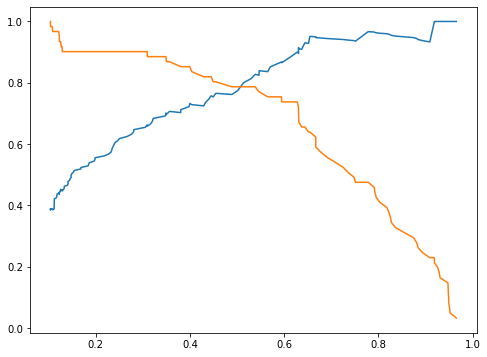

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [53]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('f1스코어: {0:4f}'.format(f1))

f1스코어: 0.780488


In [54]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    
    print('오차행렬:')
    print(confusion)
    
    print('정확도:{0}, 정밀도:{1}, 재현율:{2}, f1:{3}'.format(accuracy, precision,recall,f1))

thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)
    

threshold:0.4
오차행렬:
[[99 19]
 [10 51]]
정확도:0.8379888268156425, 정밀도:0.7285714285714285, 재현율:0.8360655737704918, f1:0.7786259541984734
threshold:0.45
오차행렬:
[[103  15]
 [ 12  49]]
정확도:0.8491620111731844, 정밀도:0.765625, 재현율:0.8032786885245902, f1:0.784
threshold:0.5
오차행렬:
[[104  14]
 [ 13  48]]
정확도:0.8491620111731844, 정밀도:0.7741935483870968, 재현율:0.7868852459016393, f1:0.7804878048780488
threshold:0.55
오차행렬:
[[109   9]
 [ 15  46]]
정확도:0.8659217877094972, 정밀도:0.8363636363636363, 재현율:0.7540983606557377, f1:0.793103448275862
threshold:0.6
오차행렬:
[[112   6]
 [ 16  45]]
정확도:0.8770949720670391, 정밀도:0.8823529411764706, 재현율:0.7377049180327869, f1:0.8035714285714285


In [59]:
from sklearn.metrics import roc_curve
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]
fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)

thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],5))

print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:',np.round(tprs[thr_index],3))


샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.96518 0.65438 0.63029 0.56504 0.45466 0.38027 0.30916 0.12908 0.12273
 0.11166 0.10393]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


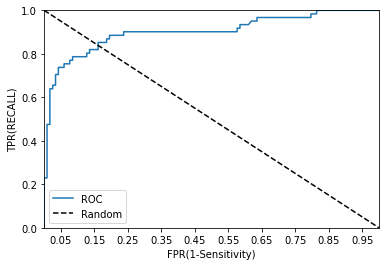

In [66]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label="ROC")
    
    plt.plot([0,1],[1,0],'k--',label='Random')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(RECALL)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])